In [2]:
!pip3 install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 740.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=584241343f39beebd991e411d21e0d4e0b51887183fe73be2ffba7b2933531c0
  Stored in directory: /Users/joseptormo/Library/Caches/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [92]:
df = pd.read_csv("data/all/meteo/sampled_df_3100.csv")
df = df.head(3100).copy()
df["fire"] = df["is_fire"].map({True:"fuego", False:"no_fuego"})
df.drop(['is_fire', 'date', 'geometry', 'TIPOBOSQUE', 'UsoIFN', 'n_CLAMFE', 'UsoMFE'], axis=1, inplace=True)

In [94]:
df

,altitud,pendiente,orientacion,n_CLAIFN,t_max,u,v,specific_humidity,relative_humidity,fire
0,226.43176,1.512323,287.237460,200,302.235107,-0.482693,-1.057308,0.011643,51.497208,no_fuego
1,591.98520,37.829388,174.613740,141,291.587646,5.145885,-2.061542,0.002844,29.498014,fuego
2,302.96150,57.214653,76.929750,111,306.062988,0.700964,0.509414,0.006809,24.005035,fuego
3,365.60150,36.542430,112.896065,141,298.082031,-2.383409,-1.082997,0.013121,67.682327,no_fuego
4,216.34225,48.399876,129.588600,140,305.471191,4.591745,-0.290295,0.004589,14.796286,fuego
...,...,...,...,...,...,...,...,...,...,...
3095,859.24400,31.082748,221.048550,111,283.306396,0.141107,-0.014968,0.003461,56.143051,no_fuego
3096,280.92273,47.743984,96.308970,132,300.440674,-1.220716,0.228699,0.007621,36.367142,fuego
3097,19.47500,0.067957,327.773000,200,287.090332,1.198263,0.681804,0.003695,37.602020,no_fuego
3098,722.36850,31.144710,182.969000,200,285.263672,0.251622,-0.695139,0.003649,47.462723,no_fuego


/var/folders/t1/7d5rd_ws0jn7w36r2y1h1m_40000gn/T/ipykernel_91940/1851299960.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().round(3)


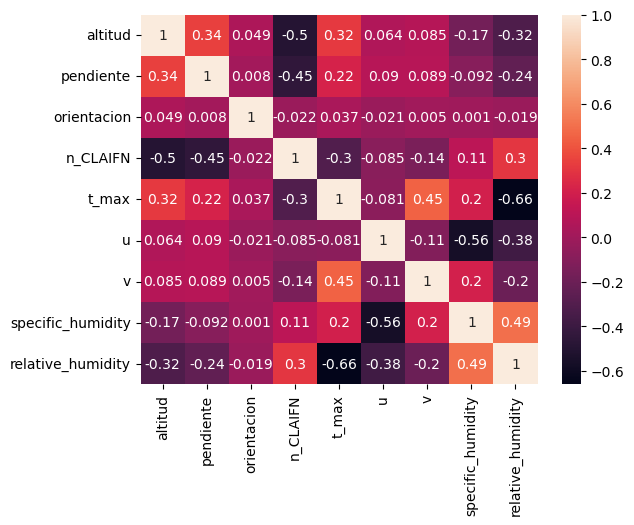

In [95]:
# Correlaciones
corr_matrix = df.corr().round(3)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [96]:
#Crea un diccionario con les unidades
unidades_diccionario = {"altitud": "m",
                    "pendiente": "%",
                    "orientacion": "grados",
                    "t_max": "Kelvin",
                    "u": "m/s",
                    "v": "m/s",
                    "specific_humidity": "kg water/kg dry air",
                    "relative_humidity": "%"}




Analisis de la variable altitud


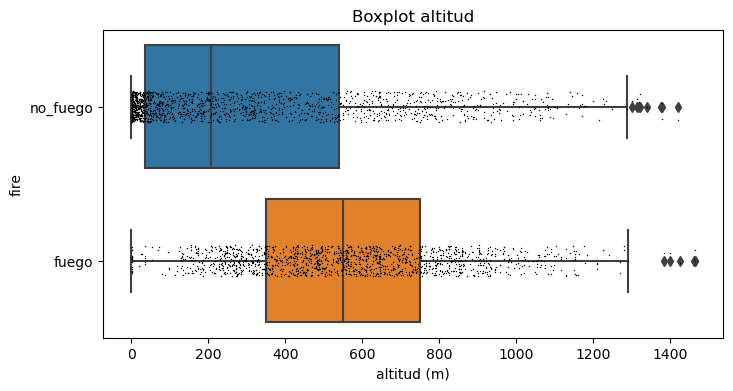

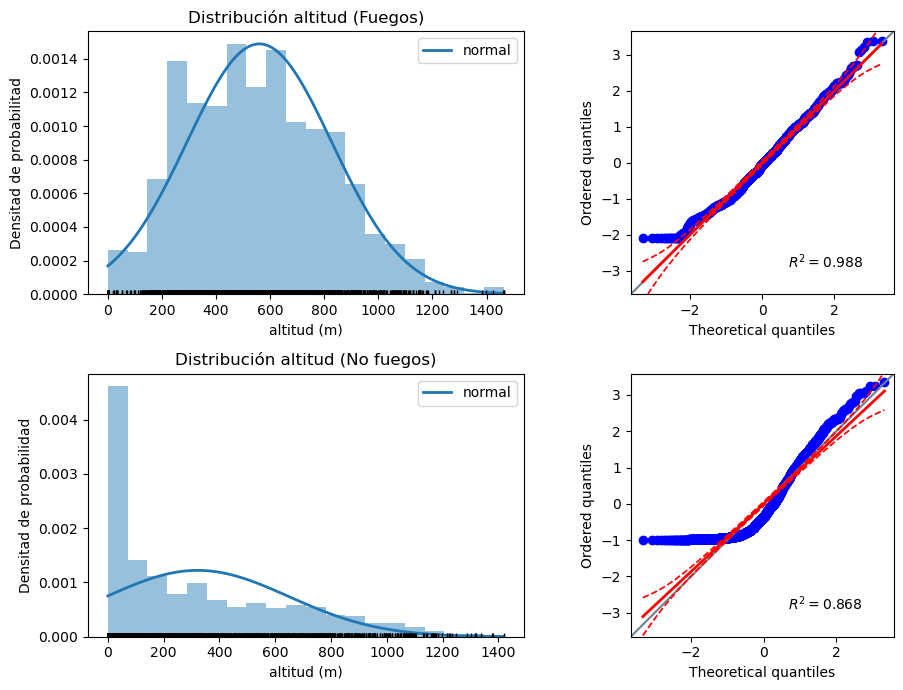


 Test de homocedasticidad
El p valor es: 2.1939914009548582e-09
Se encuentran evidencias significativas, para alpha=0.05 de que les varianzas son diferentes entre las dos poblaciones. Se aplicará la corrección de Welsh en el T-test

 T-test sobre la media
El p valor es: 1.2746340592047619e-101
Se rechaza la hipótesis nula. Tenemos evidencia suficiente de que la media de la variable altitud es diferente en los fuegos que en los no fuegos, para un alpha=0.05.


Analisis de la variable pendiente


/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


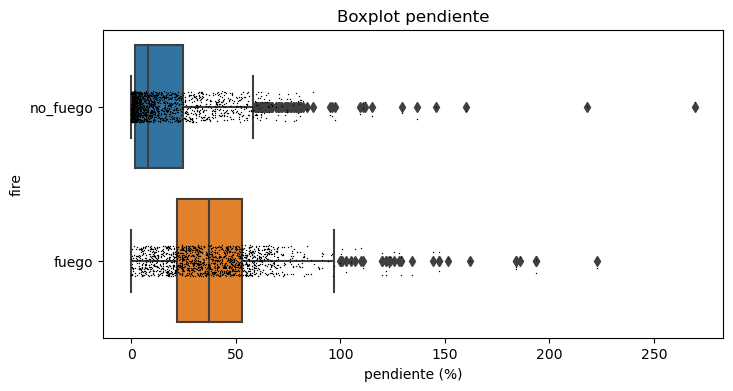

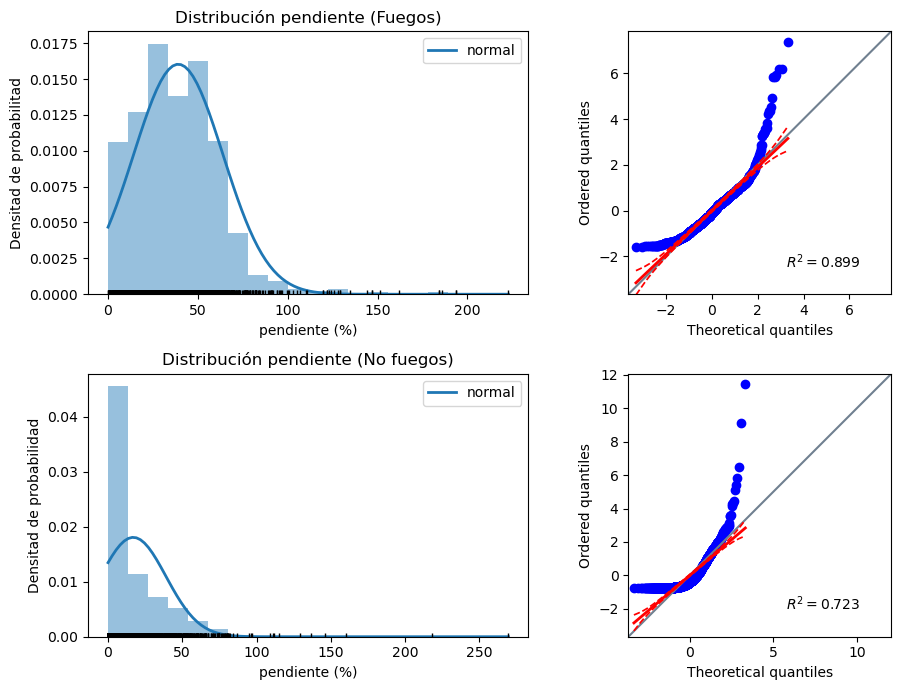


 Test de homocedasticidad
El p valor es: 7.904368293653497e-11
Se encuentran evidencias significativas, para alpha=0.05 de que les varianzas son diferentes entre las dos poblaciones. Se aplicará la corrección de Welsh en el T-test

 T-test sobre la media
El p valor es: 9.33064158970454e-137
Se rechaza la hipótesis nula. Tenemos evidencia suficiente de que la media de la variable pendiente es diferente en los fuegos que en los no fuegos, para un alpha=0.05.


Analisis de la variable orientacion


/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


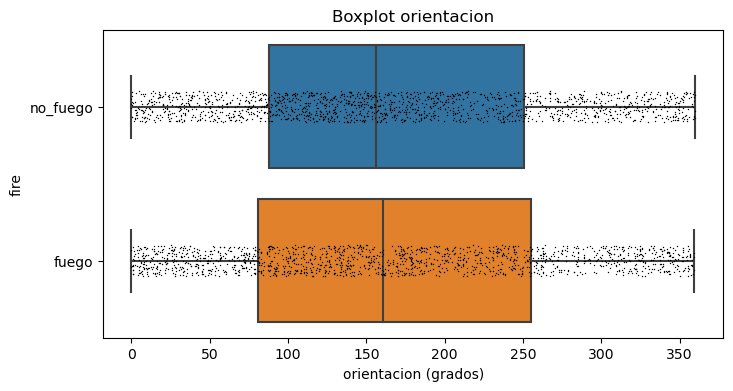

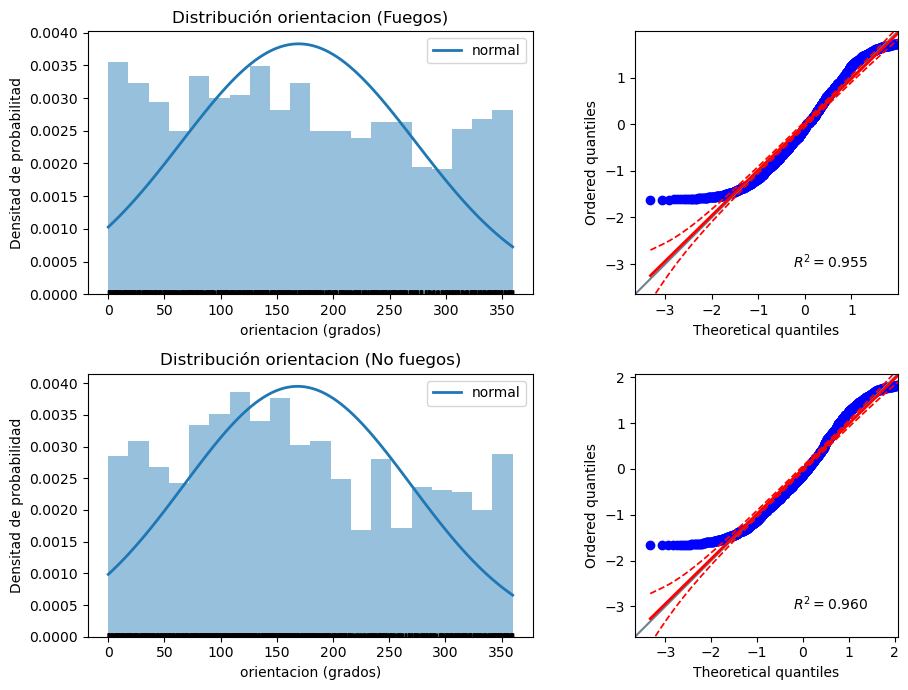


 Test de homocedasticidad
El p valor es: 0.03624663608554985
Se encuentran evidencias significativas, para alpha=0.05 de que les varianzas son diferentes entre las dos poblaciones. Se aplicará la corrección de Welsh en el T-test

 T-test sobre la media
El p valor es: 0.8628391779723098
No se puede rechazar la hipótesis nula. No tenemos evidencia suficiente de que la media de la variable orientacion es diferente en los fuegos que en los no fuegos, para un alpha=0.05.


Analisis de la variable t_max


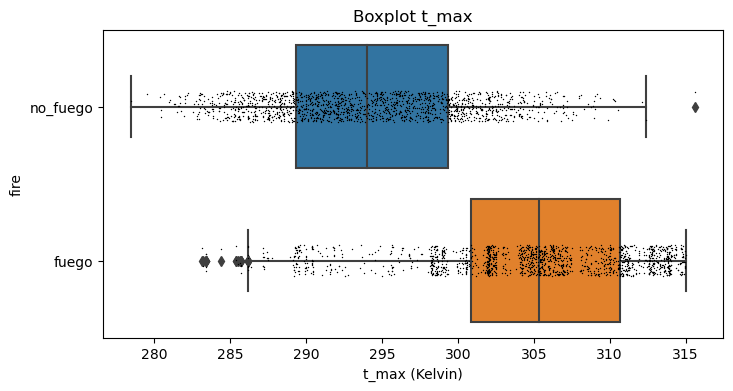

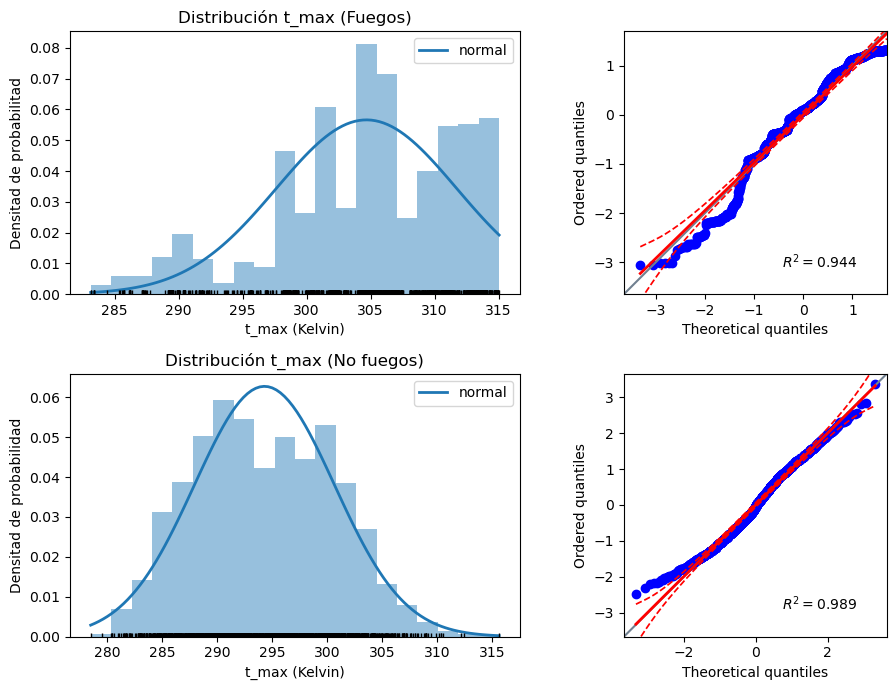


 Test de homocedasticidad
El p valor es: 0.26942210111511683
No se encuentran evidencias significativas, para alpha=0.05 de que las varianzas sean diferentes entre las dos poblaciones

 T-test sobre la media
El p valor es: 5.6102e-319
Se rechaza la hipótesis nula. Tenemos evidencia suficiente de que la media de la variable t_max es diferente en los fuegos que en los no fuegos, para un alpha=0.05.


Analisis de la variable u


/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/pingouin/bayesian.py:152: RuntimeWarning: overflow encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


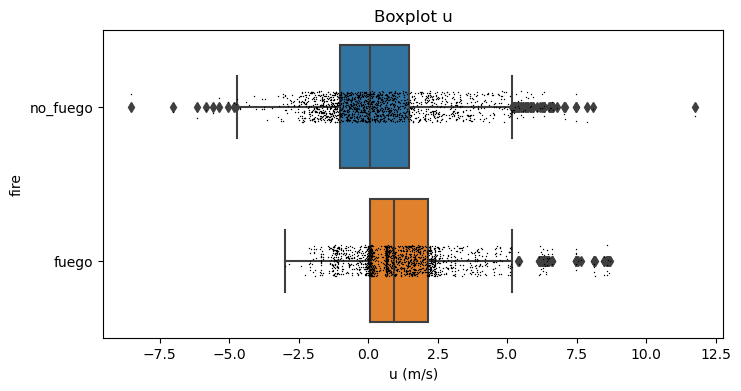

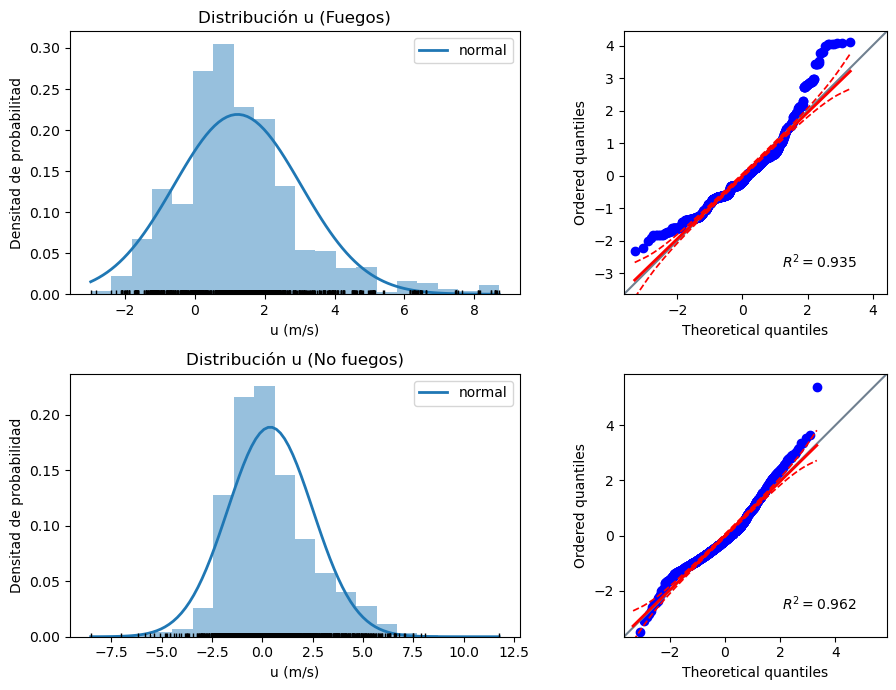


 Test de homocedasticidad
El p valor es: 2.7735913394719896e-07
Se encuentran evidencias significativas, para alpha=0.05 de que les varianzas son diferentes entre las dos poblaciones. Se aplicará la corrección de Welsh en el T-test

 T-test sobre la media
El p valor es: 4.797680524670445e-31
Se rechaza la hipótesis nula. Tenemos evidencia suficiente de que la media de la variable u es diferente en los fuegos que en los no fuegos, para un alpha=0.05.


Analisis de la variable v


/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


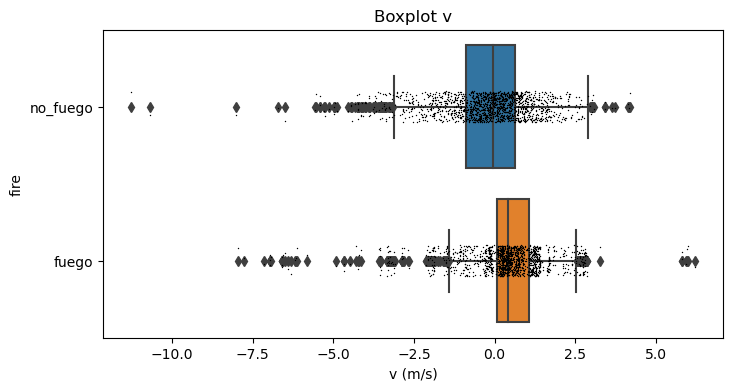

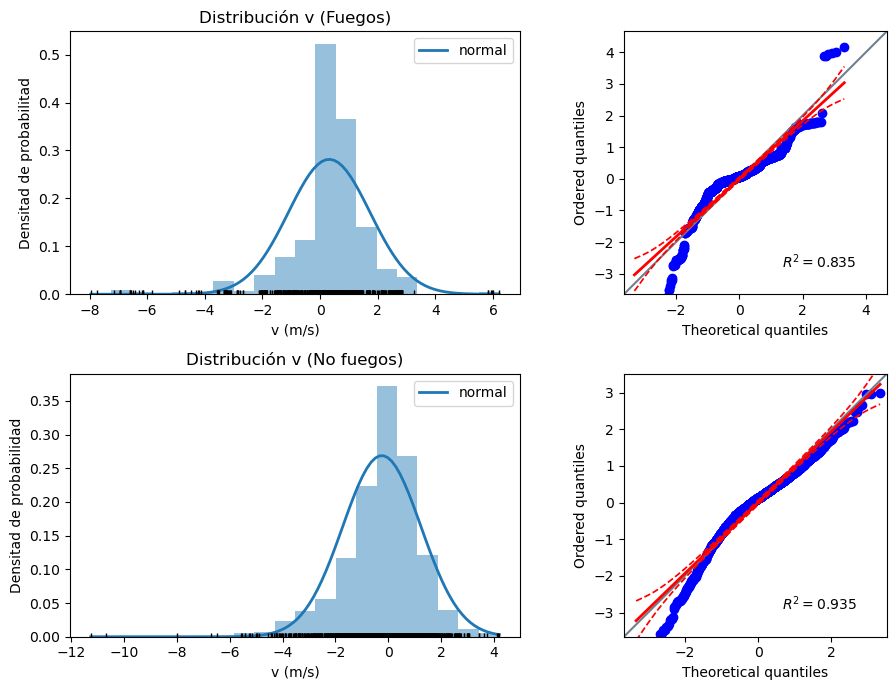


 Test de homocedasticidad
El p valor es: 1.0709075227096427e-06
Se encuentran evidencias significativas, para alpha=0.05 de que les varianzas son diferentes entre las dos poblaciones. Se aplicará la corrección de Welsh en el T-test

 T-test sobre la media
El p valor es: 2.7453966395879726e-26
Se rechaza la hipótesis nula. Tenemos evidencia suficiente de que la media de la variable v es diferente en los fuegos que en los no fuegos, para un alpha=0.05.


Analisis de la variable specific_humidity


/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


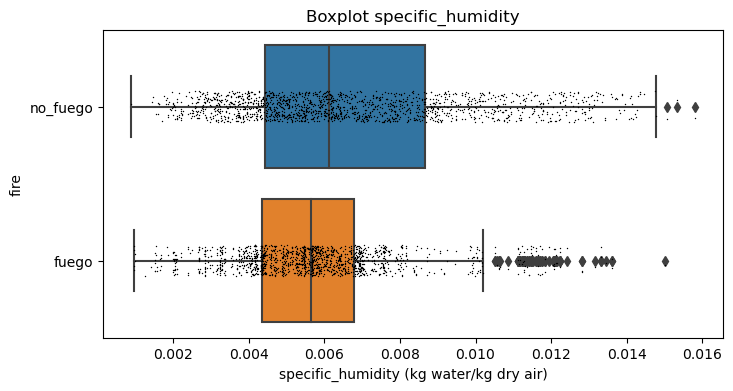

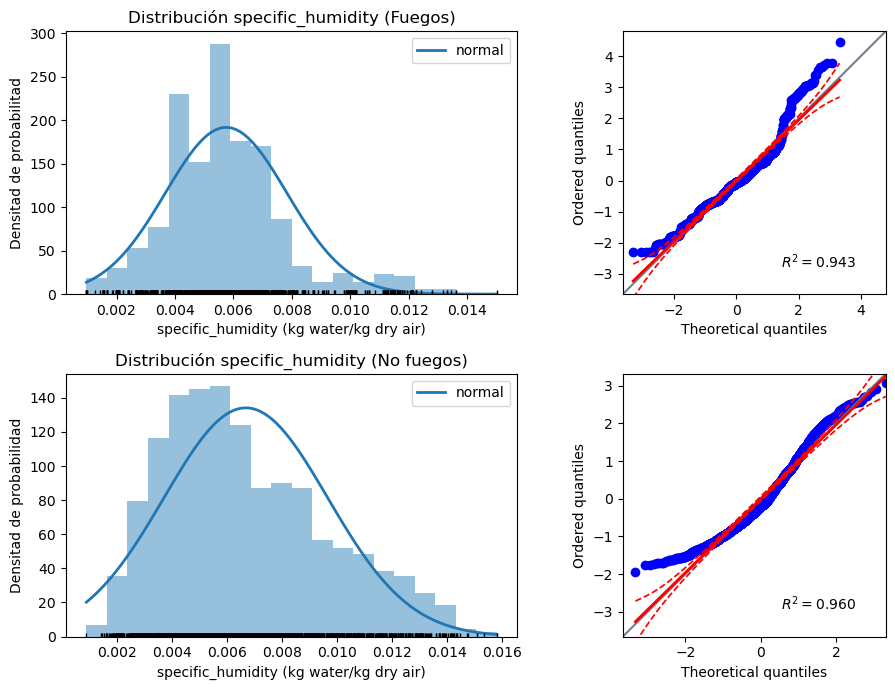


 Test de homocedasticidad
El p valor es: 1.6403730979028718e-47
Se encuentran evidencias significativas, para alpha=0.05 de que les varianzas son diferentes entre las dos poblaciones. Se aplicará la corrección de Welsh en el T-test

 T-test sobre la media
El p valor es: 7.536247679335175e-24
Se rechaza la hipótesis nula. Tenemos evidencia suficiente de que la media de la variable specific_humidity es diferente en los fuegos que en los no fuegos, para un alpha=0.05.


Analisis de la variable relative_humidity


/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


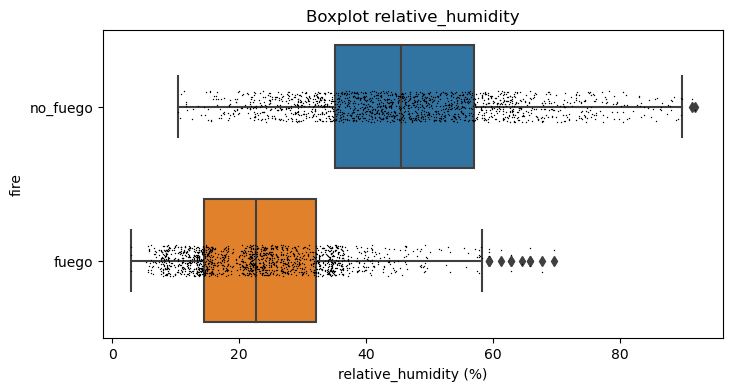

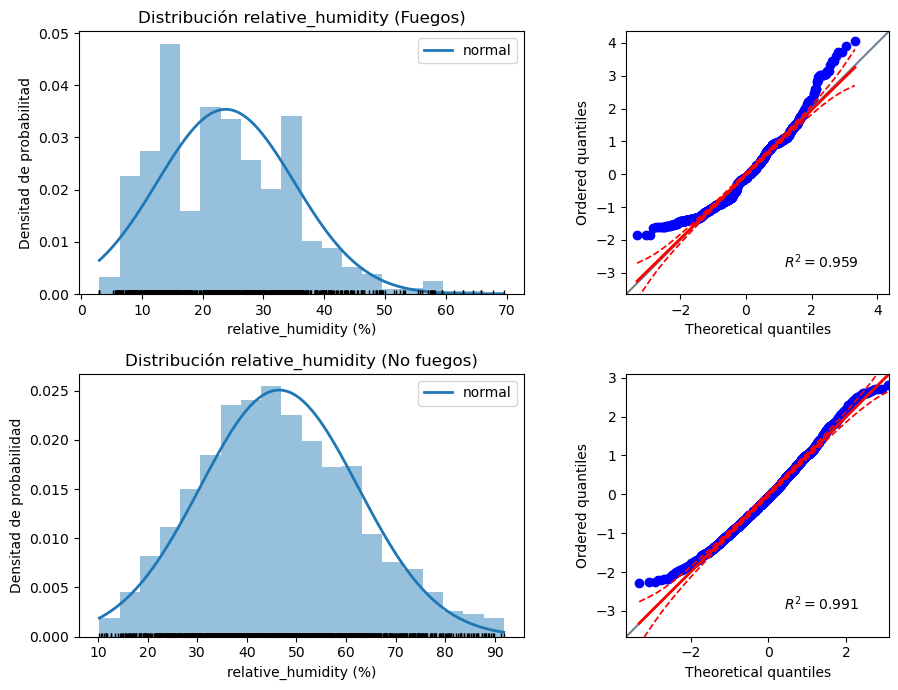


 Test de homocedasticidad
El p valor es: 3.566168630315856e-35
Se encuentran evidencias significativas, para alpha=0.05 de que les varianzas son diferentes entre las dos poblaciones. Se aplicará la corrección de Welsh en el T-test

 T-test sobre la media
El p valor es: 0.0
Se rechaza la hipótesis nula. Tenemos evidencia suficiente de que la media de la variable relative_humidity es diferente en los fuegos que en los no fuegos, para un alpha=0.05.


/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/opt/homebrew/anaconda3/envs/TFM_env/lib/python3.8/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


In [97]:
# Analisis variables cuantitativas
alpha = 0.05
for i, x in unidades_diccionario.items():
    print(f"\n\nAnalisis de la variable {i}")    
    # Boxplot
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.boxplot(y="fire", x=i, data=df)
    sns.stripplot(y="fire", x=i, data=df, color='black', alpha = 1, size=1, ax=ax);
    ax.set_title(f'Boxplot {i}')
    ax.set_xlabel(f'{i} ({x})')
    plt.show()
    
    # T-test
    # Gráficos de distribución
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    values_fire = df.loc[df.fire == "fuego", i]
    # Valores de la media (mu) i desviación típica (sigma) de cada grupo
    mu, sigma = stats.norm.fit(values_fire)

    # Valores teóricos de la normal en el rango observado
    x_hat = np.linspace(min(values_fire), max(values_fire), num=100)
    y_hat = stats.norm.pdf(x_hat, mu, sigma)

    # Gráfico distribución
    axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
    axs[0, 0].hist(x=values_fire, density=True, bins=20, color="#3182bd", alpha=0.5)
    axs[0, 0].plot(values_fire, np.full_like(values_fire, 0), '|k', markeredgewidth=1)
    axs[0, 0].set_title(f'Distribución {i} (Fuegos)')
    axs[0, 0].set_xlabel(f'{i} ({x})')
    axs[0, 0].set_ylabel('Densitad de probabilitad')
    axs[0, 0].legend()

    # Gráfico distribución qq-plot
    pg.qqplot(values_fire, dist='norm', ax=axs[0, 1])

    values_nofire = df.loc[df.fire == "no_fuego", i]
    mu, sigma = stats.norm.fit(values_nofire)
    x_hat = np.linspace(min(values_nofire), max(values_nofire), num=100)
    y_hat = stats.norm.pdf(x_hat, mu, sigma)
    axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
    axs[1, 0].hist(x=values_nofire, density=True, bins=20, color="#3182bd", alpha=0.5)
    axs[1, 0].plot(values_nofire, np.full_like(values_nofire, 0), '|k', markeredgewidth=1)
    axs[1, 0].set_title(f'Distribución {i} (No fuegos)')
    axs[1, 0].set_xlabel(f'{i} ({x})')
    axs[1, 0].set_ylabel('Densitad de probabilidad')
    axs[1, 0].legend()

    pg.qqplot(values_nofire, dist='norm', ax=axs[1, 1])
    plt.tight_layout();
    plt.show()
    
    # Test de homocedasticidad
    print("\n Test de homocedasticidad")
    W, p_value, equal_var = pg.homoscedasticity(data=df, dv=i, group='fire').iloc[0]
    print("El p valor es:", p_value)
    if equal_var:
        print(f"No se encuentran evidencias significativas, para alpha={alpha} de que las varianzas sean diferentes entre las dos poblaciones")
        correction=False
    else:
        print(f"Se encuentran evidencias significativas, para alpha={alpha} de que les varianzas son diferentes entre las dos poblaciones. Se aplicará la corrección de Welsh en el T-test")
        correction='auto'

    # T-test
    print("\n T-test sobre la media")
    T, dof, alternative, p_value, CI95, cohen, BF10, power = pg.ttest(x=values_fire, y=values_nofire, alternative='two-sided', correction=correction).iloc[0] 
    print("El p valor es:", p_value)
    conclusion = f"No se puede rechazar la hipótesis nula. No tenemos evidencia suficiente de que la media de la variable {i} es diferente en los fuegos que en los no fuegos, para un alpha={alpha}."
    if p_value <= alpha:
        conclusion = f"Se rechaza la hipótesis nula. Tenemos evidencia suficiente de que la media de la variable {i} es diferente en los fuegos que en los no fuegos, para un alpha={alpha}."
    print(conclusion)

In [98]:
np.sort(df['n_CLAIFN'].unique())

array([111, 112, 114, 121, 122, 132, 140, 141, 142, 150, 161, 171, 172,
       200, 300, 400, 500])

In [99]:
# Analisis variable categorica
classes = {111: 'Monte arbolado. Bosque', 112: 'Monte arbolado. Bosque de plantaciones', 114: 'Monte arbolado', 121: 'Monte con arbolado ralo. Bosque', 122: 'Monte con arbolado ralo. Bosque de plantaciones', 132: 'Monte arbolado temporalmente sin cobertura', 140: 'Monte desarbolado', 141: 'Monte desarbolado. Matorral', 142: 'Monte desarbolado. Herbazal o pastizal', 150: 'Monte sin vegetación superior', 161: 'Monte arbolado', 171: 'Monte desarbolado con arbolado disperso', 172: 'Monte con arbolado disperso de plantación', 200: "Agrícola", 300: 'Artificial', 400: 'Humedal', 500: 'Agua'}
df["n_CLAIFN"] = df["n_CLAIFN"].map(classes)

In [100]:
df

,altitud,pendiente,orientacion,n_CLAIFN,t_max,u,v,specific_humidity,relative_humidity,fire
0,226.43176,1.512323,287.237460,Agrícola,302.235107,-0.482693,-1.057308,0.011643,51.497208,no_fuego
1,591.98520,37.829388,174.613740,Monte desarbolado. Matorral,291.587646,5.145885,-2.061542,0.002844,29.498014,fuego
2,302.96150,57.214653,76.929750,Monte arbolado. Bosque,306.062988,0.700964,0.509414,0.006809,24.005035,fuego
3,365.60150,36.542430,112.896065,Monte desarbolado. Matorral,298.082031,-2.383409,-1.082997,0.013121,67.682327,no_fuego
4,216.34225,48.399876,129.588600,Monte desarbolado,305.471191,4.591745,-0.290295,0.004589,14.796286,fuego
...,...,...,...,...,...,...,...,...,...,...
3095,859.24400,31.082748,221.048550,Monte arbolado. Bosque,283.306396,0.141107,-0.014968,0.003461,56.143051,no_fuego
3096,280.92273,47.743984,96.308970,Monte arbolado temporalmente sin cobertura,300.440674,-1.220716,0.228699,0.007621,36.367142,fuego
3097,19.47500,0.067957,327.773000,Agrícola,287.090332,1.198263,0.681804,0.003695,37.602020,no_fuego
3098,722.36850,31.144710,182.969000,Agrícola,285.263672,0.251622,-0.695139,0.003649,47.462723,no_fuego


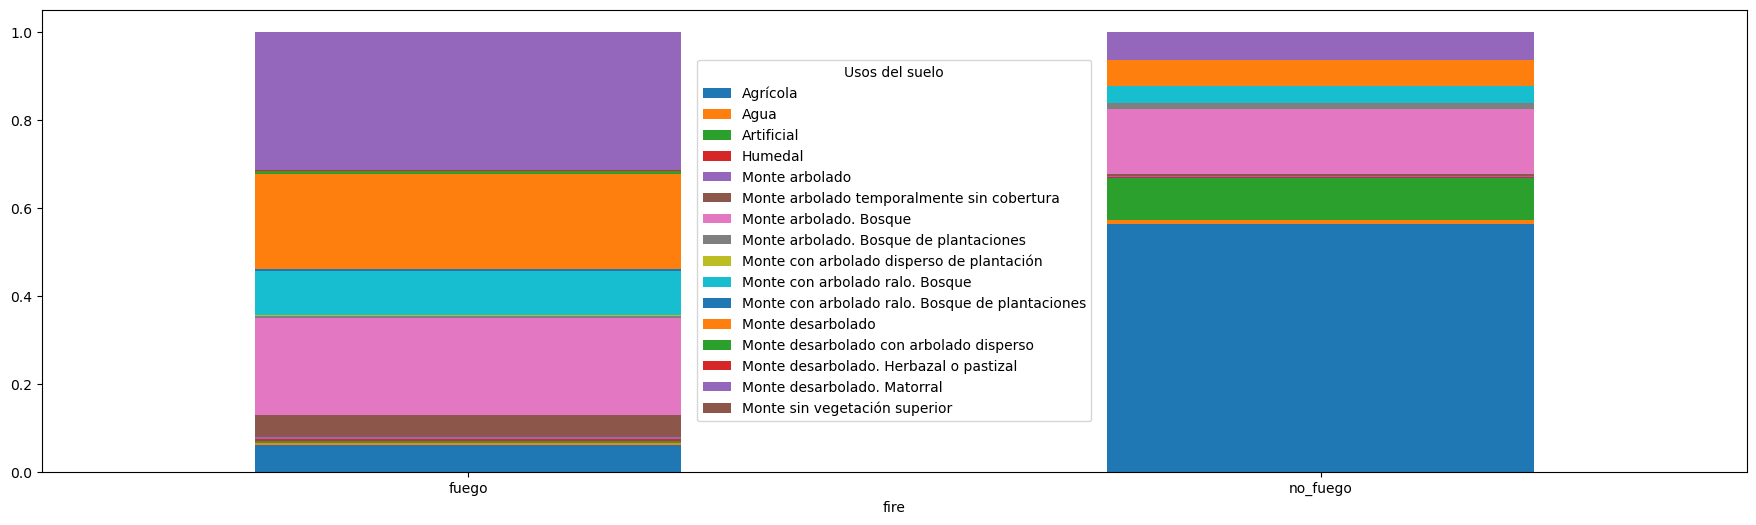

El valor de khi cuadrado es 1316.4439680473645  y el p valor és: 0.0
Se rechaza la hipótesis nula. Tenemos evidencia suficiente de que hay asociación entre fuego y uso del suelo.


In [101]:
crosstb = pd.crosstab(df["fire"], df["n_CLAIFN"], normalize='index')
crosstb.plot(kind="bar", width=1/2, stacked=True, figsize=(22,6), rot=0).legend(title="Usos del suelo", loc='center')
plt.show()
#Test de Khi quadrat
alpha = 0.05
crosstb = pd.crosstab(df["fire"], df["n_CLAIFN"], margins= True, margins_name="All")
chi_square = 0
rows = df['fire'].unique()
columns = df['n_CLAIFN'].unique()
for i in columns:
    for j in rows:
        O = crosstb[i][j]
        E = crosstb[i]['All'] * crosstb['All'][j] / crosstb['All']['All']
        chi_square += (O-E)**2/E

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "No se puede rechazar la hipótesis nula. No tenemos evidencia suficiente de que haya asociación entre fuego y uso del suelo."
if p_value <= alpha:
    conclusion = "Se rechaza la hipótesis nula. Tenemos evidencia suficiente de que hay asociación entre fuego y uso del suelo."
        
print("El valor de khi cuadrado es", chi_square, " y el p valor és:", p_value)
print(conclusion)


In [102]:
crosstb

n_CLAIFN,Agrícola,Agua,Artificial,Humedal,Monte arbolado,Monte arbolado temporalmente sin cobertura,Monte arbolado. Bosque,Monte arbolado. Bosque de plantaciones,Monte con arbolado disperso de plantación,Monte con arbolado ralo. Bosque,Monte con arbolado ralo. Bosque de plantaciones,Monte desarbolado,Monte desarbolado con arbolado disperso,Monte desarbolado. Herbazal o pastizal,Monte desarbolado. Matorral,Monte sin vegetación superior,All
fire,,,,,,,,,,,,,,,,,
fuego,90,9,6,9,4,78,334,8,3,151,8,325,13,1,476,3,1518
no_fuego,889,16,152,1,6,5,235,22,0,60,2,91,1,0,101,1,1582
All,979,25,158,10,10,83,569,30,3,211,10,416,14,1,577,4,3100
